# BOOTSTRAP
## **why do we need boostrap?**
in previous situations that we've seen (Monte Carlo methods), everything we've done was under a fundamental assumption: **knowing the distribution** of the random variable from which our sample is drawn. In reality, this assumption oftes does not hold true. We usually don't know the underlying distribution of the data.
*Bootstrap methods* allows us to use the data itself to approximate the underlying distribution, without making strong parametric assumptions. It enables us to get realistic insights into the variability and distribution of an estimator by "letting the data speak" for itself.
**Key assumption:**
The only assumption that we need to make is that the sample observations are i.i.d.(indipendent and indentically distributed)
*Remember: only correct assumptions leads to better efficiency so in situations where we're are not sure about our considerations we often .prefer to let the data talk through boostrap methods*
## **what is boostrap?**
boostrap methods can be seen as a specific technique of resampling with replacement to estimate the sampling distribution of a statistic. It allows for assess the variability of a statistic when the true sampling distribution is unknown or difficult to derive analytically.
## **types of boostrap**
+ non parametric-boostrap:
    + The non-parametric bootstrap is the most common form of bootstrap. In this approach, we resample with replacement directly from the original dataset, treating the empirical distribution (the distribution of the observed data) as an approximation of the true unknown distribution.
+ semi parametric-boostrap:
    + In semi-parametric bootstrap, we model some parts of the data while leaving other parts non-parametric. For example, you might assume a certain distribution for the errors in a regression model, but allow the independent variables (features) to be resampled non-parametrically.
+ paramtric- bootstrap: 
    + In parametric bootstrap, we assume that the data follows a specific distribution with unknown parameters. We estimate the parameters from the data and then simulate new data from the assumed distribution using those estimated parameters.
***

# NON PARAMERIC BOOTSTRAP
Suppose we wish to estimate a quantity 𝜇 using an estimator 𝑌=𝐻(𝑥) where 𝑥 is a sample drawn from an unknown distribution. To assess the quality of the estimator, one could compute metrics like variance, bias, and Mean Squared Error (MSE). Ideally, we would draw many independent replications of the sample to estimate these metrics, but in practice, this is often infeasible.

This is where bootstrap methods provide an alternative. Instead of collecting new samples, we resample the original data (with replacement), creating an empirical sample from the empirical cumulative distribution function (ecdf).

We approximate the true distribution 𝐹 with the empirical distribution based on the sample. The rationale is that the empirical cdf is a consistent estimator of the actual cdf 𝐹, and as the sample size 𝑛 increases, the Ecdf gets closer to the true cdf. 

However, **this freedom comes with a cost**. For bootstrap methods to work well, the data must be informative enough. In other words, we need a sufficiently large sample size for the empirical distribution to approximate the true distribution reasonably well.

***

The accuracy of the bootstrap approximation depends on the original sample being **representative**. If the original sample has significant bias, resampling from it will not correct the bias. Instead, it will propagate the bias across all bootstrap samples.

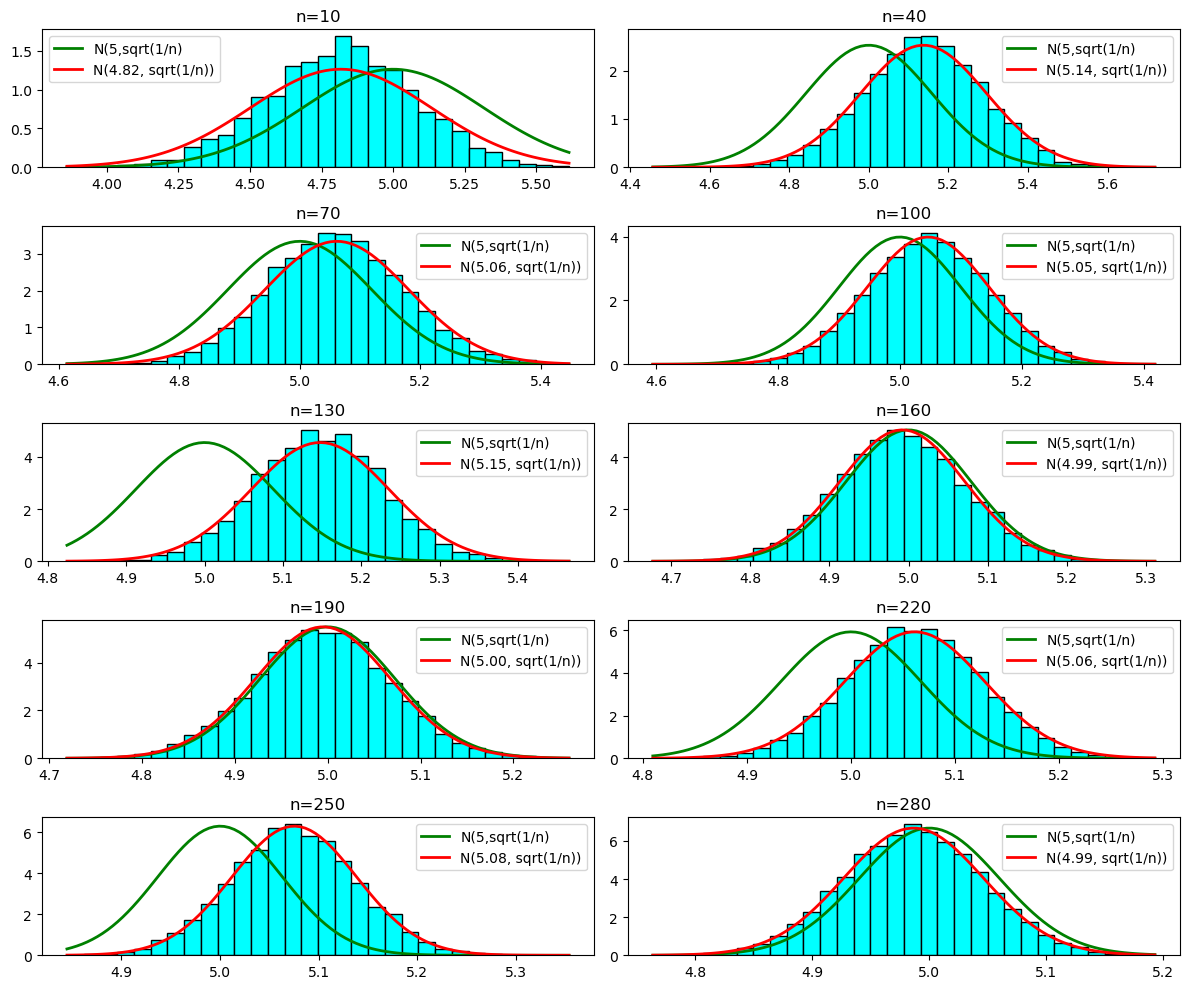

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
#Parameters
n = np.arange(10, 310, 30)
B = 10000 #number of bootstrap

#plot set up
fig, axs = plt.subplots(5,2,figsize = (12,10))
axs = np.ravel(axs)
#it's the same doing np.reshape(axs, -1)
for i in range(len(n)):
    sample = np.random.normal(loc = 5, scale =1, size = n[i])
    ybar = np.mean(sample)
    #bootstrap sampling
    ybar_bts = [np.mean(np.random.choice(sample, size = n[i], replace = True)) for _ in range(B)]
    axs[i].hist(ybar_bts, bins = 30, density = True, facecolor = 'cyan', edgecolor='black')
    axs[i].set_title(f"n={n[i]}")
    
    #plot the normal distribution curves
    x = np.linspace(min(ybar_bts), max(ybar_bts), 100)
    axs[i].plot(x, norm.pdf(x, 5, np.sqrt(1/n[i])), color = 'green', lw= 2, label= 'N(5,sqrt(1/n)')
    axs[i].plot(x, norm.pdf(x, ybar, np.sqrt(1/n[i])), color ='red', lw =2, label =f'N({ybar:.2f}, sqrt(1/n))')
    axs[i].legend()
plt.tight_layout()
plt.show()
                



The green line is showing the theoretical distribution("real" or assumed distribution), while the red line represents a normal distribution fitted to the bootstrap sample means. Specifically, this normal distribution uses the mean of the original sample (from which we are resampling) as the center
It's important to notice that:
+ since B(the number of boostrap replications) is large we are always able to capture the sample distribution, hence the redline follows closely  the histogram of the bootstrap estimates.  This shows that the bootstrap replicates capture **the variability** of the original sample. The red line matches the histogram well because it's an approximation of the sample distribution, not the underlying population distribution.
+ increasing n, the sample size, we are increasing the probability to get a sample with an ecdf close to the actual cdf. However, if the sample is biased or flawed (for instance, if the sample is not representative of the population), the bootstrap method cannot correct for this bias. Bootstrap can only approximate what is inside the given sample. Bootstrap cannot capture the true distribution underlying the sample since that information it's not **inside** the given sample. In other words, the quality of the bootstrap estimates is entirely dependent on the quality of the original sample.